In [2]:
from gensim.models import KeyedVectors
import numpy as np

In [3]:
pv = KeyedVectors.load("phrase2vec_lift100.wordvectors", mmap='r')

In [79]:
len(pv)

31427

In [4]:
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [5]:
p2v_word_mean = {}
for key in pv.key_to_index:
    if '_' in key:
        words = key.split('_')
        mean_embedding = np.mean([wv[word] for word in words if word in wv], axis=0)
        p2v_word_mean[key] = mean_embedding
    else:
        p2v_word_mean[key] = wv[key]

In [6]:
def find_most_similar(query, k):
    sim = {}
    for key in p2v_word_mean:
        sim[key] = p2v_word_mean[query].dot(p2v_word_mean[key])/ \
            np.sqrt(p2v_word_mean[query].dot(p2v_word_mean[query])* \
                    p2v_word_mean[key].dot(p2v_word_mean[key]))
    top_key = sorted(sim, key=sim.get, reverse=True)[1:k+2]
    return [(k, sim[k]) for k in top_key]

In [6]:
find_most_similar('lamb_vindaloo',10) #using word embedding

[('lamb', 0.8791162),
 ('lamb_curry', 0.8530713),
 ('lamb_shank', 0.84399647),
 ('lamb_chops', 0.7885425),
 ('vindaloo', 0.78581935),
 ('lamb_chop', 0.76653695),
 ('chicken_tikka_masala', 0.7468595),
 ('beef_and_lamb', 0.72007996),
 ('tandoori_chicken', 0.6969937),
 ('chicken_tikka', 0.6876602),
 ('tikka_masala', 0.66615516)]

In [7]:
pv.most_similar('lamb_vindaloo', topn=10)#using phrase embedding

[('chicken_tikka_masala', 0.7488511204719543),
 ('saag_paneer', 0.7111663818359375),
 ('lamb_curry', 0.708605170249939),
 ('palak_paneer', 0.6865326762199402),
 ('tikka_masala', 0.6855555772781372),
 ('korma', 0.6831828951835632),
 ('masala', 0.6779918074607849),
 ('chicken_tikka', 0.6693699955940247),
 ('paneer', 0.6684088110923767),
 ('vindaloo', 0.6666150093078613)]

In [8]:
find_most_similar('new_york_strip',10) #using word embedding

[('ny_strip', 0.8653947),
 ('york_strip', 0.85459864),
 ('new_york_city', 0.8005393),
 ('new_york', 0.772062),
 ('new_york_new_york', 0.772062),
 ('strip_district', 0.73696554),
 ('ny_strip_steak', 0.73305225),
 ('york_new_york', 0.732925),
 ('strip', 0.72085136),
 ('strip_mall', 0.70849913),
 ('new_york_new', 0.6865122)]

In [9]:
pv.most_similar('new_york_strip', topn=10) #using phrase embedding

[('ny_strip', 0.8296418190002441),
 ('ribeye', 0.8121824264526367),
 ('bone_in_ribeye', 0.8084273338317871),
 ('rib_eye', 0.8067247271537781),
 ('porterhouse', 0.7969276905059814),
 ('bone_in_rib_eye', 0.7919773459434509),
 ('rib-eye', 0.7888673543930054),
 ('bone-in_rib_eye', 0.7803928852081299),
 ('filet', 0.7762506008148193),
 ('bone-in_ribeye', 0.7762439846992493)]

In [10]:
find_most_similar('baby_back_ribs',10)

[('back', 0.6323703),
 ('back_again_and_again', 0.5861801),
 ('spare_ribs', 0.5793356),
 ('ribs', 0.5698595),
 ('back_again_soon', 0.566648),
 ('back_and_forth', 0.5500201),
 ('back_here_anytime', 0.54154795),
 ('coming_back_here_again', 0.5373372),
 ('back_anytime_soon', 0.532756),
 ('louis_ribs', 0.522866),
 ('short_ribs', 0.5165845)]

In [11]:
pv.most_similar('baby_back_ribs', topn=10)

[('ribs', 0.8342549204826355),
 ('rib_tips', 0.7303236722946167),
 ('pork_ribs', 0.7256657481193542),
 ('burnt_ends', 0.6881771087646484),
 ('brisket', 0.6801818013191223),
 ('bbq_ribs', 0.6708328723907471),
 ('pulled_pork', 0.6647703647613525),
 ('short_ribs', 0.6574428081512451),
 ('hot_links', 0.6508707404136658),
 ('collard_greens', 0.6412736177444458)]

In [7]:
find_most_similar('kung_pao_chicken',10)

[('pao_chicken', 0.91306335),
 ('kung_pao', 0.8433067),
 ('cashew_chicken', 0.8346657),
 ('chicken_satay', 0.8125438),
 ('lemongrass_chicken', 0.8077635),
 ('tso_chicken', 0.7963175),
 ('chicken_chow_mein', 0.79090697),
 ('teriyaki_chicken', 0.78949845),
 ('chicken_teriyaki', 0.78949845),
 ('chicken_piccata', 0.7854986),
 ('chicken_lo_mein', 0.78493464)]

In [8]:
pv.most_similar('kung_pao_chicken', topn=10)

[('mongolian_beef', 0.8343057632446289),
 ('orange_chicken', 0.8299736380577087),
 ('sesame_chicken', 0.7974308729171753),
 ("general_tso_'s_chicken", 0.7947790622711182),
 ('cashew_chicken', 0.7922334671020508),
 ('pad_thai', 0.7854003310203552),
 ('kung_pao', 0.775714099407196),
 ('sweet_and_sour_chicken', 0.7707173228263855),
 ('shrimp_fried_rice', 0.7630671262741089),
 ('pork_fried_rice', 0.7614849209785461)]

In [10]:
find_most_similar('pinot_noir',10)

[('pinot_grigio', 0.9361285),
 ('pinot', 0.93091065),
 ('noir', 0.882528),
 ('sauvignon_blanc', 0.75893784),
 ('cabernet', 0.7514704),
 ('chardonnay', 0.73922646),
 ('sauvignon', 0.72989905),
 ('malbec', 0.7277781),
 ('riesling', 0.71760803),
 ('merlot', 0.70418507),
 ('grigio', 0.69585043)]

In [11]:
pv.most_similar('pinot_noir', topn=10)

[('cabernet', 0.8143666386604309),
 ('sauvignon_blanc', 0.807169497013092),
 ('malbec', 0.8048314452171326),
 ('chardonnay', 0.7955701947212219),
 ('pinot', 0.782367467880249),
 ('pinot_grigio', 0.7725052833557129),
 ('riesling', 0.771155059337616),
 ('chianti', 0.7438011169433594),
 ('zinfandel', 0.731484055519104),
 ('merlot', 0.7242016792297363)]

In [13]:
find_most_similar('sam_\'s_club',10)

[("player_'s_club", 0.83763856),
 ("earl_'s_club", 0.8240331),
 ("drai_'s", 0.75260186),
 ("capriotti_'s", 0.726322),
 ("hooter_'s", 0.72298396),
 ("durant_'s", 0.7144961),
 ("binion_'s", 0.71343875),
 ("aiello_'s", 0.7125625),
 ("quizno_'s", 0.7118342),
 ("albertson_'s", 0.71011233),
 ("barney_'s", 0.7098357)]

In [14]:
pv.most_similar('sam_\'s_club', topn=10)

[('costco', 0.7229515910148621),
 ('safeway', 0.6636866331100464),
 ('smiths', 0.6525583267211914),
 ('vons', 0.6486243009567261),
 ('albertsons', 0.6460613012313843),
 ('wal-mart', 0.6422725915908813),
 ('walmart', 0.6411256790161133),
 ('trader_joes', 0.6409727931022644),
 ('harris_teeter', 0.6375798583030701),
 ("walgreen_'s", 0.6344089508056641)]

In [17]:
find_most_similar('pf_changs',10)

[('pf_chang', 0.89560556),
 ('p.f_chang', 0.8303971),
 ('pf', 0.82601506),
 ('changs', 0.80465937),
 ("pf_chang_'s", 0.77812123),
 ('p.f', 0.7561961),
 ("p.f_chang_'s", 0.71766573),
 ('chang', 0.6680273),
 ('pei_wei', 0.5468824),
 ("chang_'s", 0.51083905),
 ('benihana', 0.49267817)]

In [20]:
pv.most_similar('pf_changs', topn=10)

[('panda_express', 0.7061288356781006),
 ("pf_chang_'s", 0.7009183764457703),
 ('pei_wei', 0.6875666975975037),
 ("p.f_chang_'s", 0.6812081336975098),
 ('olive_garden', 0.6768958568572998),
 ("applebee_'s", 0.6190544962882996),
 ('cheesecake_factory', 0.6139678955078125),
 ('red_lobster', 0.5988444089889526),
 ('applebees', 0.5889335870742798),
 ('pf_chang', 0.585593044757843)]

In [25]:
find_most_similar('hard_rock',10)

[('rock_hard', 1.0),
 ('hard_rock_cafe', 0.856652),
 ('hard_rock_hotel', 0.82923454),
 ('hard_core', 0.74773264),
 ('hard', 0.72075063),
 ('hard_as_a_rock', 0.69906884),
 ('hard_boiled', 0.652925),
 ('hard_pressed', 0.6483285),
 ('hard_earned', 0.633382),
 ('rock', 0.6032163),
 ('punk_rock', 0.599695)]

In [29]:
pv.most_similar('hard_rock', topn=10)

[('hard_rock_hotel', 0.7304854989051819),
 ('palms', 0.6729397773742676),
 ('cosmopolitan', 0.6459872722625732),
 ('aria', 0.6443426012992859),
 ('palazzo', 0.6422041058540344),
 ('mgm', 0.6409392356872559),
 ('hrh', 0.6386034488677979),
 ('mgm_grand', 0.6294108629226685),
 ('cosmo', 0.6285386681556702),
 ('ph', 0.6278110146522522)]

In [36]:
find_most_similar('popeyes',10)

[('kfc', 0.705366),
 ('bojangles', 0.6690155),
 ('chick-fil-a', 0.5833295),
 ('popeye', 0.56570756),
 ('bww', 0.4792011),
 ('chipotle', 0.47888282),
 ('robertos', 0.47694096),
 ('qdoba', 0.4671259),
 ('filibertos', 0.4663027),
 ('canes', 0.4635705),
 ('mcdonalds', 0.4635311)]

In [35]:
pv.most_similar('popeyes', topn=10)

[("popeye_'s", 0.7539619207382202),
 ('kfc', 0.709630012512207),
 ('bojangles', 0.6601171493530273),
 ("raising_cane_'s", 0.6541659235954285),
 ('el_pollo_loco', 0.6286672949790955),
 ('chick-fil-a', 0.6056889295578003),
 ('pei_wei', 0.5833148956298828),
 ("wendy_'s", 0.5761545300483704),
 ('cafe_rio', 0.5572197437286377),
 ('panda_express', 0.55351722240448)]

In [37]:
find_most_similar('red_lobster',10)

[('red_snapper', 0.795673),
 ('red_cabbage', 0.77814925),
 ('lobster', 0.7648751),
 ('maine_lobster', 0.76420563),
 ('red', 0.75623924),
 ('lobster_tail', 0.74554),
 ('red_chile', 0.7334207),
 ('red_curry', 0.73264354),
 ('shrimp_and_lobster', 0.7321305),
 ('red_chili', 0.731391),
 ('red_mango', 0.72913235)]

In [38]:
pv.most_similar('red_lobster', topn=10)

[('olive_garden', 0.688864529132843),
 ('outback', 0.6621080636978149),
 ('applebees', 0.636206865310669),
 ('benihana', 0.6242192983627319),
 ('golden_corral', 0.6240056753158569),
 ('texas_roadhouse', 0.6175784468650818),
 ("applebee_'s", 0.6172181963920593),
 ('outback_steakhouse', 0.6140963435173035),
 ('tgif', 0.6030594706535339),
 ('pf_changs', 0.5988444685935974)]

In [39]:
find_most_similar('movie_theatre',10)

[('movie_theater', 0.9723757),
 ('movie', 0.8847195),
 ('movie_theaters', 0.86908734),
 ('theatre', 0.84135914),
 ('theater', 0.80433786),
 ('concert_venue', 0.7057043),
 ('movies', 0.6691836),
 ('concert', 0.6434834),
 ('cinema', 0.6412205),
 ('harkins', 0.63970023),
 ('flick', 0.6306611)]

In [40]:
pv.most_similar('movie_theatre', topn=10)

[('movie_theater', 0.7900931239128113),
 ('bowling_alley', 0.6653438210487366),
 ('theater', 0.6134263873100281),
 ('theatre', 0.5819531083106995),
 ('cinema', 0.5797797441482544),
 ('movie_theaters', 0.5617132186889648),
 ('harkins', 0.5601080656051636),
 ('ipic', 0.5490955710411072),
 ('amc', 0.5327345728874207),
 ('food_court', 0.5285505652427673)]

In [12]:
find_most_similar('gas_station',10)

[('gas_stations', 0.83993554),
 ('station', 0.7728608),
 ('gas', 0.74649316),
 ('sunset_station', 0.73694885),
 ('radio_station', 0.7360776),
 ('station_casinos', 0.73527193),
 ('carving_station', 0.7323403),
 ('train_station', 0.72315216),
 ('palace_station', 0.6818015),
 ('gas_tank', 0.67655355),
 ('bus_station', 0.6748766)]

In [13]:
pv.most_similar('gas_station', topn=10)

[('circle_k', 0.7509974837303162),
 ('convenience_store', 0.7126755714416504),
 ('7-11', 0.6833009719848633),
 ('qt', 0.6452143788337708),
 ('chevron', 0.6449202299118042),
 ('wal-mart', 0.6254286766052246),
 ('liquor_store', 0.6230791211128235),
 ('starbucks', 0.6202013492584229),
 ('harris_teeter', 0.6171915531158447),
 ('grocery_store', 0.6045012474060059)]

In [14]:
find_most_similar('trader_joe_\'s',10)

[("joe_'s_farm", 0.7837119),
 ("aj_'s", 0.77242327),
 ('trader_joe', 0.7711776),
 ("albertson_'s", 0.7608523),
 ("lowe_'s", 0.7590137),
 ('trader_joes', 0.74426204),
 ("rudy_'s", 0.7442378),
 ("basha_'s", 0.74090666),
 ("quizno_'s", 0.73308426),
 ("portillo_'s", 0.7299124),
 ("glazier_'s", 0.7293061)]

In [15]:
pv.most_similar('trader_joe_\'s', topn=10)

[('whole_foods', 0.8081161975860596),
 ('trader_joes', 0.7638802528381348),
 ('safeway', 0.7166928052902222),
 ('albertsons', 0.7070872187614441),
 ('walmart', 0.6971803903579712),
 ('costco', 0.697063684463501),
 ('vons', 0.6935687065124512),
 ('winco', 0.6902263760566711),
 ('giant_eagle', 0.6857698559761047),
 ('harris_teeter', 0.6809657216072083)]

In [16]:
find_most_similar('american_express',10)

[('express', 0.7708801),
 ('american', 0.7669102),
 ('african_american', 0.7095183),
 ('american_chinese', 0.69805175),
 ('american_fare', 0.69369894),
 ('panda_express', 0.6889127),
 ('traditional_american', 0.6836724),
 ('american_cuisine', 0.67534477),
 ('american_style', 0.6698615),
 ('native_american', 0.66322595),
 ('american_kobe', 0.65254)]

In [17]:
pv.most_similar('american_express', topn=10)

[('amex', 0.8074123859405518),
 ('visa', 0.6816932559013367),
 ('debit_cards', 0.6280720233917236),
 ('debit', 0.6025761961936951),
 ('debit/credit', 0.5903992056846619),
 ('credit/debit', 0.5634458661079407),
 ('credit_cards', 0.529003381729126),
 ('credit_card', 0.5102347731590271),
 ('cc', 0.5048595070838928),
 ('account', 0.49866512417793274)]

In [18]:
find_most_similar('red_snapper',10)

[('red_lobster', 0.795673),
 ('red_curry', 0.7807002),
 ('red_cabbage', 0.7541274),
 ('red_mango', 0.74214345),
 ('red', 0.7320991),
 ('red_chile', 0.72853446),
 ('jade_red_chicken', 0.7271831),
 ('red_peppers', 0.708254),
 ('red_pepper', 0.7062238),
 ('red_chili', 0.70398444),
 ('snapper', 0.70282644)]

In [19]:
pv.most_similar('red_snapper', topn=10)

[('snapper', 0.7388752698898315),
 ('halibut', 0.7350245118141174),
 ('sea_bass', 0.7248669266700745),
 ('salmon', 0.6944115161895752),
 ('grouper', 0.689299464225769),
 ('swordfish', 0.6677346229553223),
 ('yellow_tail', 0.6486342549324036),
 ('tilapia', 0.6471425294876099),
 ('butterfish', 0.6437366604804993),
 ('chilean_sea_bass', 0.6427236795425415)]

In [20]:
find_most_similar('rip_off',10)

[('total_rip_off', 0.85429627),
 ('rip_me_off', 0.7293677),
 ('ripped_off', 0.7120504),
 ('rip_you_off', 0.7101525),
 ('knock_off', 0.69090104),
 ('sectioned_off', 0.69067377),
 ('roped_off', 0.6882399),
 ('ticked_off', 0.68439627),
 ('drop_off', 0.6746987),
 ('blocked_off', 0.6568476),
 ('pissed_off', 0.6527515)]

In [21]:
pv.most_similar('rip_off', topn=10)

[('ripoff', 0.8049395084381104),
 ('rip-off', 0.7816300988197327),
 ('scam', 0.7063252329826355),
 ('sham', 0.649137020111084),
 ('waste_of_money', 0.6113258600234985),
 ('total_rip_off', 0.6102744340896606),
 ('complete_joke', 0.5616369843482971),
 ('waste_of_time', 0.5571643710136414),
 ('joke', 0.5552241206169128),
 ('waste_of_time_and_money', 0.5524364113807678)]

In [22]:
find_most_similar('stay_away',10)

[('stay_far_away', 0.801307),
 ('stay_away_from', 0.7896206),
 ('stay_far_away_from', 0.6918894),
 ('stay', 0.63728696),
 ('away', 0.6144281),
 ('throw_away', 0.5889871),
 ('extended_stay', 0.58733547),
 ('stay_tuned', 0.5820747),
 ('stay_far_far_away', 0.57816523),
 ('block_away', 0.57658076),
 ('mile_away', 0.5668294)]

In [23]:
pv.most_similar('stay_away', topn=10)

[('avoid_this_place_at_all_costs', 0.6717947721481323),
 ('do_not_eat_here', 0.6570154428482056),
 ('do_not_stay_here', 0.6488558650016785),
 ('do_not_go_here', 0.6474832892417908),
 ('stay_away_from', 0.6465854644775391),
 ('avoid_at_all_costs', 0.6362009048461914),
 ('go_somewhere_else', 0.6101713180541992),
 ('spend_your_money_elsewhere', 0.5974336266517639),
 ('stay_somewhere_else', 0.5820608735084534),
 ('avoid_this_place_like_the_plague', 0.5812249183654785)]

In [24]:
find_most_similar('come_back',10)

[('def_come_back', 0.9319645),
 ('come_back_tomorrow', 0.9280801),
 ('definitely_come_back_again', 0.8740752),
 ('come_back_here_again', 0.86935765),
 ('come_back_and_try', 0.8534807),
 ('coming_back', 0.81347615),
 ('never_come_back_here_again', 0.8081812),
 ('wait_to_come_back', 0.8053583),
 ('go_back_there_again', 0.8021362),
 ('consider_coming_back', 0.79722595),
 ('go_back_again_and_again', 0.79275393)]

In [25]:
pv.most_similar('come_back', topn=10)

[('return', 0.8623172044754028),
 ('go_there_again', 0.7597213387489319),
 ('eat_here_again', 0.7310922145843506),
 ('eat_there_again', 0.7163803577423096),
 ('try_it_again', 0.7077999114990234),
 ('be_returning', 0.6987223625183105),
 ('come_back_here_again', 0.6956342458724976),
 ('stay_here_again', 0.6948364973068237),
 ('be_going_back', 0.6806947588920593),
 ('give_them_another_try', 0.6593993902206421)]

In [53]:
find_most_similar('highly_recommended',10)

[('recommended', 0.7535861),
 ('highly', 0.68466616),
 ('highly_rated', 0.67406327),
 ('highly_recommend', 0.65714335),
 ('highly_recommend_checking', 0.6167455),
 ('highly_suggest', 0.6140898),
 ('highly_doubt', 0.56515735),
 ('suggested', 0.5342651),
 ('strongly_recommend', 0.5127915),
 ('recommend_avoiding', 0.475731),
 ('recommends', 0.45735973)]

In [54]:
pv.most_similar('highly_recommended', topn=10)

[('recommended', 0.6275034546852112),
 ('highly_recommend', 0.4874325692653656),
 ('would_definitely_recommend', 0.4720180034637451),
 ('did_not_disappoint', 0.4463396668434143),
 ('would_totally_recommend', 0.4383988678455353),
 ('recommended_to_me_by', 0.41431301832199097),
 ("did_n't_disappoint", 0.4066770374774933),
 ('recommending', 0.3991471529006958),
 ('recommends', 0.39192846417427063),
 ('reccomend', 0.3836936354637146)]

In [55]:
find_most_similar('false_advertisement',10)

[('false_advertising', 0.9014278),
 ('false', 0.82166934),
 ('advertisement', 0.7740782),
 ('advertising', 0.66560584),
 ('advertisements', 0.5403657),
 ('ads', 0.5197859),
 ('ad', 0.49093926),
 ('misleading', 0.47399557),
 ('bogus', 0.47238132),
 ('neon_sign', 0.4607426),
 ('billboard', 0.45594284)]

In [56]:
pv.most_similar('false_advertisement', topn=10)

[('false_advertising', 0.5715084671974182),
 ('bullshit', 0.4597684442996979),
 ('scam', 0.442947655916214),
 ('bs', 0.425071656703949),
 ('advertisements', 0.4155733287334442),
 ('bogus', 0.4138934314250946),
 ('sham', 0.4119930565357208),
 ('blatant', 0.3943748474121094),
 ('fraud', 0.39431047439575195),
 ('bait_and_switch', 0.3876253366470337)]

In [78]:
find_most_similar('blow_you_away',10)

[('you', 0.72911),
 ('rip_you_off', 0.72395104),
 ('ask_you_if_you', 0.6674157),
 ('guess_you_get_what_you', 0.6670712),
 ('start_you_off', 0.6641805),
 ('you_get_what_you_pay', 0.66008985),
 ('fill_you_up', 0.6527013),
 ('kick_you_out', 0.64428),
 ('pick_you_up', 0.64322305),
 ('blow_me_away', 0.6393354),
 ("you_'ll_be_glad_you", 0.63802016)]

In [77]:
pv.most_similar('blow_you_away', topn=10)

[('blow_your_mind', 0.7994450330734253),
 ('knock_your_socks_off', 0.7743569612503052),
 ('bring_me_back', 0.6450387835502625),
 ('suffice', 0.6353962421417236),
 ('keep_me_away', 0.6198937892913818),
 ('keep_me_from', 0.6196178197860718),
 ('be_eating_here_again', 0.6191664934158325),
 ('be_staying_here_again', 0.6180388927459717),
 ('break_the_bank', 0.6155309081077576),
 ('be_going_here_again', 0.5990796685218811)]

In [67]:
find_most_similar('waste_of_money',10)

[('waste_of_time_and_money', 0.79998845),
 ('what_a_waste_of_money', 0.76700705),
 ('waste_of_space', 0.7613912),
 ('spend_a_lot_of_money', 0.7102344),
 ('waste_of_time', 0.70294964),
 ('save_money', 0.6792697),
 ('spending_money', 0.6784565),
 ('waste_your_money', 0.67485183),
 ('complete_waste_of_time', 0.66341734),
 ('spent_a_lot_of_money', 0.6589444),
 ('spend_the_money', 0.6497752)]

In [66]:
pv.most_similar('waste_of_money', topn=10)

[('waste_of_time_and_money', 0.7229926586151123),
 ('waste_of_time', 0.7118080854415894),
 ('rip_off', 0.6113259196281433),
 ('waste_of_my_time', 0.5933855772018433),
 ('rip-off', 0.5632680058479309),
 ('waste', 0.5425467491149902),
 ('ripoff', 0.5411168932914734),
 ('letdown', 0.5232685208320618),
 ('what_a_waste_of_money', 0.5087049007415771),
 ('huge_disappointment', 0.4980964958667755)]

In [28]:
find_most_similar('black_friday',10)

[('friday', 0.75291485),
 ('friday_and_saturday', 0.74230933),
 ('thursday', 0.7167004),
 ('saturday', 0.70486265),
 ('friday_and_saturday_nights', 0.6919368),
 ('wednesday', 0.6856665),
 ('saturday_and_sunday', 0.6793641),
 ('friday_or_saturday', 0.6781271),
 ('friday_or_saturday_night', 0.67754877),
 ('friday_afternoon', 0.6693022),
 ('monday', 0.6654902)]

In [29]:
pv.most_similar('black_friday', topn=10)

[('labor_day', 0.5921285152435303),
 ('holiday', 0.5608869194984436),
 ('opening_weekend', 0.559313952922821),
 ('memorial_day', 0.5504113435745239),
 ('july_4th', 0.5426462292671204),
 ('holiday_weekend', 0.5339215993881226),
 ('christmas_eve', 0.5232721567153931),
 ('4th_of_july', 0.5189844369888306),
 ('weekend', 0.5114989876747131),
 ('holiday_season', 0.5079110860824585)]

In [30]:
find_most_similar('buy_one_get_one_free',10)

[('buy_one_get_one', 0.93990463),
 ('one_get_one_free', 0.9342758),
 ('get_one_free', 0.93194836),
 ('buy_one_get', 0.89517987),
 ('buy_1_get', 0.7674571),
 ('get_1_free', 0.72951937),
 ('buy', 0.65742725),
 ('1_get_1', 0.6106723),
 ('one', 0.58680534),
 ('buy_tickets', 0.5675722),
 ('get_rid', 0.5575031)]

In [31]:
pv.most_similar('buy_one_get_one_free', topn=10)

[('bogo', 0.7932785749435425),
 ('2_for_1', 0.7789703011512756),
 ('2-for-1', 0.7584856152534485),
 ('buy_one_get_one', 0.7238240242004395),
 ('half-off', 0.5744544863700867),
 ('coupon_for_a_free', 0.538178563117981),
 ('free', 0.5373127460479736),
 ('promo', 0.5334417819976807),
 ('half-price', 0.5243359208106995),
 ('discounted', 0.5049667954444885)]

In [32]:
find_most_similar('michael_jackson',10)

[('michael_kors', 0.83809274),
 ('michael', 0.8313928),
 ('jackson', 0.8251565),
 ('michael_mina', 0.79220563),
 ('david_copperfield', 0.6822008),
 ('david', 0.61261266),
 ('barry', 0.60324174),
 ('jordan', 0.5986328),
 ('justin', 0.59588414),
 ('brooks', 0.59296817),
 ('paul', 0.583533)]

In [33]:
pv.most_similar('michael_jackson', topn=10)

[('britney_spears', 0.6749311089515686),
 ('celine_dion', 0.6425768733024597),
 ('elvis', 0.6360968947410583),
 ('celine', 0.632135272026062),
 ('lady_gaga', 0.6273902058601379),
 ('impersonator', 0.6128605008125305),
 ('elton', 0.6094824075698853),
 ('carrot_top', 0.6003864407539368),
 ('beatles', 0.5985799431800842),
 ('david_copperfield', 0.5881426930427551)]

In [34]:
find_most_similar('star_wars',10)

[('+1_star', 0.8421709),
 ('fifth_star', 0.834858),
 ('star', 0.82973874),
 ('-1_star', 0.821245),
 ('5th_star', 0.81658),
 ('shining_star', 0.8065074),
 ('michelin_star', 0.8063405),
 ('star_rating', 0.80078185),
 ('4.5_star', 0.8002926),
 ('1_star_rating', 0.7861274),
 ('star_trek', 0.78097695)]

In [35]:
pv.most_similar('star_wars', topn=10)

[('harry_potter', 0.575786828994751),
 ('pawn_stars', 0.556412935256958),
 ('memorabilia', 0.5517230033874512),
 ('comics', 0.5514630079269409),
 ('star_trek', 0.5488657355308533),
 ('cartoon', 0.5471622943878174),
 ('films', 0.5415935516357422),
 ('video_game', 0.5391843914985657),
 ('comic', 0.5340136885643005),
 ('fiction', 0.5314691066741943)]

In [36]:
find_most_similar('bmw',10)

[('mercedes', 0.7816958),
 ('lexus', 0.7605115),
 ('toyota', 0.7503296),
 ('vw', 0.7373883),
 ('audi', 0.7358724),
 ('honda', 0.7328468),
 ('volvo', 0.7292362),
 ('nissan', 0.7252979),
 ('acura', 0.69907576),
 ('car_dealership', 0.6979114),
 ('mazda', 0.68770736)]

In [37]:
pv.most_similar('bmw', topn=10)

[('lexus', 0.7729480266571045),
 ('mercedes', 0.7578004002571106),
 ('toyota', 0.7527322769165039),
 ('audi', 0.7475761771202087),
 ('honda', 0.734687089920044),
 ('nissan', 0.7313339114189148),
 ('vw', 0.7269374132156372),
 ('acura', 0.7157704830169678),
 ('volvo', 0.7001819610595703),
 ('jeep', 0.6983031630516052)]

In [38]:
find_most_similar('sam_adams',10)

[('sam_woo', 0.80379474),
 ('sam', 0.78410107),
 ('sam_fox', 0.7321492),
 ('adams', 0.7300699),
 ('sams', 0.54374343),
 ("sam_'s_club", 0.5097069),
 ('stella', 0.49757358),
 ('miller', 0.4882115),
 ('yuengling', 0.4804398),
 ('robbie', 0.47625613),
 ('miller_lite', 0.441058)]

In [39]:
pv.most_similar('sam_adams', topn=10)

[('fat_tire', 0.7392278909683228),
 ('yuengling', 0.7155603766441345),
 ('stella', 0.7141091823577881),
 ('kiltlifter', 0.7128024697303772),
 ('sierra_nevada', 0.7047154307365417),
 ('coors_light', 0.7026113867759705),
 ('pilsner', 0.6845979690551758),
 ('miller_lite', 0.6769223213195801),
 ('guiness', 0.674321174621582),
 ('lager', 0.6724190711975098)]

In [40]:
def find_most_similar_triplet(query, positive, negative, k):
    sim = {}
    vector = p2v_word_mean[query] + p2v_word_mean[positive] - p2v_word_mean[negative]
    vector /= np.sqrt(vector.dot(vector))
    for key in p2v_word_mean:
        sim[key] = vector.dot(p2v_word_mean[key])/ \
            np.sqrt(p2v_word_mean[query].dot(p2v_word_mean[query]))
    top_key = sorted(sim, key=sim.get, reverse=True)[1:k+2]
    return [(k, sim[k]) for k in top_key]

In [41]:
pv.most_similar(['chicken_tikka_masala','chinese'],['indian'])

[('kung_pao_chicken', 0.6677590608596802),
 ("general_tso_'s_chicken", 0.6636512279510498),
 ('sweet_and_sour_chicken', 0.6535249948501587),
 ('pad_thai', 0.6515058279037476),
 ('orange_chicken', 0.6472142338752747),
 ("general_tso_'s", 0.6271734833717346),
 ('mongolian_beef', 0.6249250769615173),
 ('fried_rice', 0.6247451305389404),
 ('kung_pao', 0.6238416433334351),
 ('singapore_noodles', 0.6183832287788391)]

In [42]:
find_most_similar_triplet('chicken_tikka_masala','chinese','indian', 10)

[('tso_chicken', 0.847726),
 ('fried_chicken', 0.8019269),
 ('teriyaki_chicken', 0.7917419),
 ('chicken_teriyaki', 0.7917419),
 ('chicken_katsu', 0.7765558),
 ('chicken_noodle_soup', 0.7613805),
 ('pork', 0.7592694),
 ('rice', 0.75526804),
 ('chicken_wings', 0.7527378),
 ('chinese_chicken_salad', 0.75221753),
 ('broccoli', 0.75197685)]

In [43]:
pv.most_similar(['chicken_tikka_masala','korean'],['indian'])

[('bibimbap', 0.6351625323295593),
 ('kimchi_fried_rice', 0.5879839062690735),
 ('bulgogi', 0.5840677618980408),
 ('galbi', 0.5832093954086304),
 ('kalbi', 0.5780476927757263),
 ('chicken_katsu', 0.5743175148963928),
 ('kung_pao_chicken', 0.5608468055725098),
 ('pancit', 0.5583246946334839),
 ('pineapple_fried_rice', 0.5581871867179871),
 ('singapore_noodles', 0.5574873685836792)]

In [44]:
find_most_similar_triplet('chicken_tikka_masala','korean','indian', 10)

[('pork', 0.9211243),
 ('pork_ribs', 0.8275507),
 ('sauce', 0.8241638),
 ('chicken_katsu', 0.80240214),
 ('teriyaki_chicken', 0.79478234),
 ('chicken_teriyaki', 0.79478234),
 ('chicken_skewers', 0.7822317),
 ('marinated_pork', 0.77114254),
 ('chicken_wings', 0.7698989),
 ('fried_chicken', 0.7644578),
 ('chicken_fajitas', 0.7607274)]

In [45]:
pv.most_similar(['chicken_tikka_masala','japanese'],['indian'])

[('yakisoba', 0.5030895471572876),
 ('kimchi_fried_rice', 0.49489933252334595),
 ('bibimbap', 0.4912426173686981),
 ('butterfish', 0.4886576235294342),
 ('gobi', 0.48325470089912415),
 ('seaweed_salad', 0.48208627104759216),
 ('hotpot', 0.4809083938598633),
 ('chicken_katsu', 0.4799357056617737),
 ('yakitori', 0.47972196340560913),
 ('katsu_curry', 0.4735664129257202)]

In [46]:
find_most_similar_triplet('chicken_tikka_masala','japanese','indian', 10)

[('fried_chicken', 0.7114883),
 ('sauce', 0.71041),
 ('salad', 0.70288783),
 ('beef', 0.6945649),
 ('chicken_katsu', 0.69246435),
 ('pork', 0.6886938),
 ('chicken_skewers', 0.68676454),
 ('teriyaki_chicken', 0.68434125),
 ('chicken_teriyaki', 0.68434125),
 ('grilled_chicken_salad', 0.6789767),
 ('shrimp', 0.66812617)]

In [47]:
pv.most_similar(['chicken_tikka_masala','italian'],['indian'])

[('lasagna', 0.6072453856468201),
 ('baked_ziti', 0.587261438369751),
 ('chicken_marsala', 0.5868086814880371),
 ('pasta', 0.5829657316207886),
 ('chicken_parm', 0.5803238749504089),
 ('rigatoni', 0.5789533853530884),
 ('chicken_parmesan', 0.5781385898590088),
 ('bolognese', 0.5780925750732422),
 ('fettuccine_alfredo', 0.5759519338607788),
 ('ziti', 0.5709116458892822)]

In [48]:
find_most_similar_triplet('chicken_tikka_masala','italian','indian', 10)

[('cheese', 0.9007643),
 ('chicken_salad_sandwich', 0.8767701),
 ('salad', 0.8765892),
 ('grilled_chicken_salad', 0.83598083),
 ('grilled_chicken', 0.8156766),
 ('chicken_parmesan', 0.80413216),
 ('chicken_alfredo', 0.80215603),
 ('chicken_parm', 0.7960438),
 ('grilled_chicken_sandwich', 0.7960307),
 ('sauce', 0.7955325),
 ('chicken_wings', 0.7867361)]

In [49]:
pv.most_similar(['chicken_tikka_masala','mexican'],['indian'])

[('chicken_chimichanga', 0.6000179648399353),
 ('carnitas_burrito', 0.5940988659858704),
 ('carne_asada', 0.5901860594749451),
 ('chile_relleno', 0.5888283848762512),
 ('pollo', 0.5799379944801331),
 ('chile_rellenos', 0.5794435143470764),
 ('carnitas', 0.5787737369537354),
 ('burro', 0.5769017934799194),
 ('steak_fajitas', 0.576671838760376),
 ('carne_asada_burrito', 0.5708556771278381)]

In [50]:
find_most_similar_triplet('chicken_tikka_masala','mexican','indian', 10)

[('chicken_quesadilla', 0.84027094),
 ('chicken_enchiladas', 0.8353465),
 ('burrito', 0.8193125),
 ('chicken_fajitas', 0.8140136),
 ('sauce', 0.7849661),
 ('chicken_chimichanga', 0.7774658),
 ('chicken_fajita', 0.76583153),
 ('cheese', 0.7647797),
 ('chicken_mole', 0.76334035),
 ('tacos', 0.7593667),
 ('fried_chicken', 0.75886655)]

In [51]:
pv.most_similar(['chicken_tikka_masala','french'],['indian'])

[('chocolate_croissant', 0.44142764806747437),
 ('croque_monsieur', 0.43355706334114075),
 ('steak_frites', 0.4318660497665405),
 ('croque_madame', 0.42589983344078064),
 ('croque', 0.42506203055381775),
 ('cheese_danish', 0.4190402030944824),
 ('bananas_foster', 0.4161113500595093),
 ('lobster_risotto', 0.41511887311935425),
 ('cappuccino', 0.4135320484638214),
 ('brioche', 0.41106200218200684)]

In [52]:
find_most_similar_triplet('chicken_tikka_masala','french','indian', 10)

[('chicken', 0.78300136),
 ('cheese', 0.7802186),
 ('potato', 0.76673645),
 ('french_fries', 0.736523),
 ('potato_salad', 0.7220526),
 ('potato_fries', 0.7013185),
 ('chicken_salad_sandwich', 0.7000062),
 ('potatoes', 0.68948114),
 ('french_toast', 0.67791975),
 ('salad', 0.67736864),
 ('garlic', 0.6667124)]

In [53]:
pv.most_similar(['chicken_tikka_masala','mediterranean'],['indian'])

[('moussaka', 0.6588674187660217),
 ('chicken_tikka', 0.6266454458236694),
 ('chicken_shawarma', 0.6224196553230286),
 ('lentil_soup', 0.6164937615394592),
 ('hummus_appetizer', 0.6126445531845093),
 ('humus', 0.6032371520996094),
 ('greek_salad', 0.6003979444503784),
 ('mixed_grill', 0.5950077176094055),
 ('chicken_kabob', 0.5944403409957886),
 ('chicken_souvlaki', 0.5913903713226318)]

In [54]:
find_most_similar_triplet('chicken_tikka_masala','mediterranean','indian', 10)

[('salad', 0.855009),
 ('chicken_salad_sandwich', 0.831237),
 ('grilled_chicken_salad', 0.82749087),
 ('grilled_chicken', 0.8137318),
 ('chicken_wrap', 0.80984294),
 ('chicken_quesadilla', 0.7778435),
 ('grilled_chicken_sandwich', 0.765555),
 ('spinach_salad', 0.7624749),
 ('chicken_fajitas', 0.75641334),
 ('chicken_kabob', 0.75584215),
 ('fried_chicken', 0.748893)]

In [55]:
pv.most_similar(['chicken_tikka_masala','thai'],['indian'])

[('pad_thai', 0.7513605952262878),
 ('panang_curry', 0.7265278697013855),
 ('green_curry', 0.7166466116905212),
 ('pineapple_fried_rice', 0.7116812467575073),
 ('yellow_curry', 0.7089362740516663),
 ('red_curry', 0.7016952037811279),
 ('panang', 0.6997680068016052),
 ('pad_see_ew', 0.6966274976730347),
 ('tom_yum_soup', 0.6896529197692871),
 ('drunken_noodles', 0.6792545318603516)]

In [56]:
find_most_similar_triplet('chicken_tikka_masala','thai','indian', 10)

[('tso_chicken', 0.82553655),
 ('curry', 0.8245528),
 ('thai', 0.82395643),
 ('chicken_satay', 0.81090915),
 ('soup', 0.80485785),
 ('sauce', 0.79012716),
 ('chicken_katsu', 0.78994447),
 ('lemongrass_chicken', 0.7862238),
 ('chicken_wings', 0.78412354),
 ('chicken_noodle_soup', 0.7837389),
 ('spicy', 0.7808894)]

In [80]:
pv.most_similar(['chicken_tikka_masala','german'],['indian'])

[('schnitzel', 0.5215099453926086),
 ("shepherd_'s_pie", 0.4952056109905243),
 ('chicken_pot_pie', 0.4760470986366272),
 ('gobi', 0.4590258002281189),
 ('chicken_and_dumplings', 0.455737441778183),
 ('kofta', 0.45312631130218506),
 ('lamb_vindaloo', 0.4351862072944641),
 ('spaetzle', 0.4305463135242462),
 ('moussaka', 0.42588385939598083),
 ('lentil_soup', 0.425852507352829)]

In [81]:
find_most_similar_triplet('chicken_tikka_masala','german','indian', 10)

[('chicken', 0.6574709),
 ('sausage', 0.6256715),
 ('potato', 0.60954607),
 ('potato_salad', 0.5995882),
 ('potato_fries', 0.59516025),
 ('salad', 0.5896303),
 ('sausage_gravy', 0.58863163),
 ('chicken_salad_sandwich', 0.58179975),
 ('fries', 0.58077455),
 ('corn', 0.5725964),
 ('cheddar_cheese', 0.5687748)]

In [57]:
pv.most_similar(['chicken_tikka_masala','vietnam'],['indian'])

[('pho_ga', 0.43696776032447815),
 ('lemon_grass', 0.4352845251560211),
 ('tom_yum', 0.42617347836494446),
 ('beef_stew', 0.4261304438114166),
 ('nam', 0.4156004786491394),
 ('wonton_noodle_soup', 0.4023911654949188),
 ('lemongrass_chicken', 0.39777395129203796),
 ('general_tao', 0.3954038918018341),
 ('pad_kee_mao', 0.39365309476852417),
 ('vegetable_soup', 0.38979023694992065)]

In [58]:
find_most_similar_triplet('chicken_tikka_masala','vietnam','indian', 10)

[('broth', 0.5263343),
 ('soup', 0.51830035),
 ('chicken_wrap', 0.5152303),
 ('grilled_chicken', 0.50690037),
 ('chicken_quesadilla', 0.5043293),
 ('chicken_fajitas', 0.48372525),
 ('chicken_salad_sandwich', 0.4822069),
 ('grilled_chicken_salad', 0.4797914),
 ('mushroom_soup', 0.47960013),
 ('bone', 0.4766805),
 ('chicken_katsu', 0.47622257)]

In [59]:
pv.most_similar(['trader_joe_\'s','expensive'],['cheap'])

[('whole_foods', 0.6264664530754089),
 ("albertson_'s", 0.5566861033439636),
 ('albertsons', 0.554368793964386),
 ('trader_joes', 0.5453779101371765),
 ('costco', 0.5352588891983032),
 ("aj_'s", 0.5335346460342407),
 ('walmart', 0.5334241986274719),
 ('vons', 0.5295282006263733),
 ('safeway', 0.5247744917869568),
 ('harris_teeter', 0.5247673988342285)]

In [60]:
find_most_similar_triplet('trader_joe_\'s','expensive','cheap', 10)

[('pricey', 0.79969066),
 ('than', 0.7132415),
 ("'s", 0.6860301),
 ('pricier_than', 0.6606659),
 ('pricy', 0.6087658),
 ('pricier', 0.6080903),
 ('less_expensive_than', 0.594581),
 ('overpriced', 0.59213203),
 ('inconvenient', 0.57708925),
 ('cheaper_than', 0.56773573),
 ('more_expensive_than', 0.53960925)]

In [61]:
pv.most_similar(['whole_foods','expensive'],['cheap'])

[("trader_joe_'s", 0.5915745496749878),
 ('wf', 0.5464296340942383),
 ('albertsons', 0.5446096062660217),
 ("albertson_'s", 0.5397065877914429),
 ('harris_teeter', 0.5367621183395386),
 ('walmart', 0.5301644802093506),
 ("aj_'s", 0.5295321345329285),
 ('safeway', 0.5174601078033447),
 ('giant_eagle', 0.5139941573143005),
 ('costco', 0.5088167786598206)]

In [62]:
find_most_similar_triplet('whole_foods','expensive','cheap', 10)

[('than', 0.6655198),
 ('foods', 0.58129144),
 ('pricey', 0.56459314),
 ('pricier_than', 0.54588234),
 ('whole_foods', 0.5415319),
 ('items', 0.52586424),
 ('less_expensive_than', 0.50196636),
 ('whole', 0.50177246),
 ('smaller_than', 0.49971473),
 ('much', 0.49261695),
 ('disappointing', 0.49067587)]

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [82]:
countries = ['indian','chinese','korean','japanese','thai','italian','mexican','french','mediterranean','vietnam','german']
dishes = ['chicken_tikka_masala',]
for c in countries[1:]:
    d = pv.most_similar(['chicken_tikka_masala',c],['indian'])[0][0]
    dishes.append(d)
vectors = np.array([pv[key] for key in countries + dishes])

In [83]:
pca = PCA(n_components=2)
pca.fit(vectors)

PCA(n_components=2)

In [84]:
vectors2d = -pca.transform(vectors)

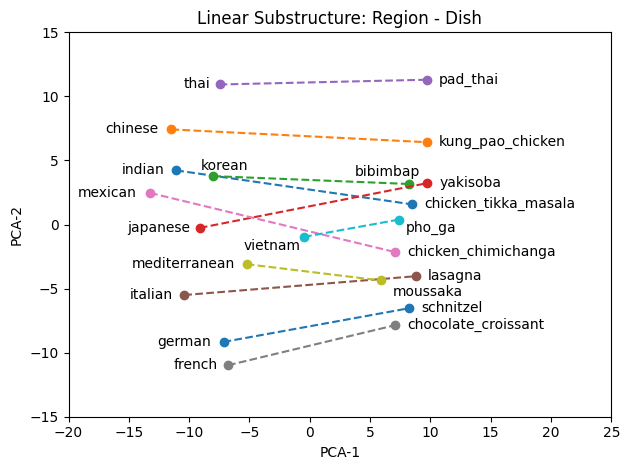

In [115]:
l = len(dishes)
cxoffsets = -np.ones(l)*4.5
cyoffsets = np.zeros(l)-0.3
cxoffsets[1] = -5.5
cxoffsets[2] = -1
cyoffsets[2] = 0.5
cxoffsets[3] = -6
cxoffsets[4] = -3
cyoffsets[4] = -0.3
cxoffsets[6] = -6
cxoffsets[8] = -9.5
cxoffsets[9] = -5
cyoffsets[9] = -1
cxoffsets[10] = -5.5
dxoffsets = np.ones(l)*1
dyoffsets = np.zeros(l)-0.3
dxoffsets[2] = -4.5
dyoffsets[2] = 0.6
dyoffsets[5] = -0.3
dxoffsets[9] = 0.5
dyoffsets[9] = -1
dxoffsets[8] = 1
dyoffsets[8] = -1.2
for i in range(l):
    plt.plot(vectors2d[[i,i+l],0],-vectors2d[[i,i+l],1],'--o')
    plt.text(vectors2d[i,0]+cxoffsets[i],-vectors2d[i,1]+cyoffsets[i],countries[i])
    plt.text(vectors2d[i+l,0]+dxoffsets[i],-vectors2d[i+l,1]+dyoffsets[i],dishes[i])
plt.xlim(-20,25)
plt.ylim(-15,15)
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.title("Linear Substructure: Region - Dish")
plt.tight_layout()
plt.savefig("phrase2vec_linear_structure.pdf")